# Import datasets

In [29]:
import pandas as pd

# Load the CSV file into a DataFrame
df1 = pd.read_csv('Data.csv')
df2 = pd.read_csv('material.csv')
df_original1 = df1.copy()
df_original2 = df2.copy()

In [30]:
print(df1.head(10).to_string(index=False))

 Std                               ID       Material Heat treatment  Su  Sy   A5   Bhn      E     G  mu   Ro    pH Desc  HV
ANSI D8894772B88F495093C43AF905AB6373 Steel SAE 1015      as-rolled 421 314 39.0 126.0 207000 79000 0.3 7860   NaN  NaN NaN
ANSI 05982AC66F064F9EBC709E7A4164613A Steel SAE 1015     normalized 424 324 37.0 121.0 207000 79000 0.3 7860   NaN  NaN NaN
ANSI 356D6E63FF9A49A3AB23BF66BAC85DC3 Steel SAE 1015       annealed 386 284 37.0 111.0 207000 79000 0.3 7860   NaN  NaN NaN
ANSI 1C758F8714AC4E0D9BD8D8AE1625AECD Steel SAE 1020      as-rolled 448 331 36.0 143.0 207000 79000 0.3 7860   NaN  NaN NaN
ANSI DCE10036FC1946FC8C9108D598D116AD Steel SAE 1020     normalized 441 346 35.8 131.0 207000 79000 0.3 7860 550.0  NaN NaN
ANSI 2EC038241908434FA714FEEBE24DDEFE Steel SAE 1020       annealed 395 295 36.5 111.0 207000 79000 0.3 7860   NaN  NaN NaN
ANSI 356B183DD9E34A1C80A5028D43B9E149 Steel SAE 1022      as-rolled 503 359 35.0 149.0 207000 79000 0.3 7860   NaN  NaN NaN
ANSI 95C

In [31]:
print(df2.head(10).to_string(index=False))

                      Material  Su  Sy      E     G  mu   Ro   Use
 ANSI Steel SAE 1015 as-rolled 421 314 207000 79000 0.3 7860  True
ANSI Steel SAE 1015 normalized 424 324 207000 79000 0.3 7860  True
  ANSI Steel SAE 1015 annealed 386 284 207000 79000 0.3 7860  True
 ANSI Steel SAE 1020 as-rolled 448 331 207000 79000 0.3 7860  True
ANSI Steel SAE 1020 normalized 441 346 207000 79000 0.3 7860  True
  ANSI Steel SAE 1020 annealed 395 295 207000 79000 0.3 7860  True
 ANSI Steel SAE 1022 as-rolled 503 359 207000 79000 0.3 7860  True
ANSI Steel SAE 1022 normalized 483 359 207000 79000 0.3 7860  True
  ANSI Steel SAE 1022 annealed 450 317 207000 79000 0.3 7860  True
 ANSI Steel SAE 1030 as-rolled 552 345 207000 79000 0.3 7860 False


# Identify the total number of materials and heat treatment types. 

In [32]:
# Find distinct values in the 'material' column of df1
distinct_materials = df1['Material'].nunique()
print("Total number of materials in df1:", len(df1['Material']))
print("Total number of unique materials in df1:", distinct_materials)

distinct_heat_treatments = df1['Heat treatment'].nunique()
print("Total number of heat treatments in df1:", len(df1['Heat treatment']))
print("Total number of unique heat treatments in df1:", distinct_heat_treatments)

Total number of materials in df1: 1552
Total number of unique materials in df1: 1225
Total number of heat treatments in df1: 1552
Total number of unique heat treatments in df1: 44


# Check for any missing or inconsistent data values

In [33]:
from  data_quality_check import data_quality_check
data_quality_check(df1)

1. Dataset Information:
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Std             1552 non-null   object 
 1   ID              1552 non-null   object 
 2   Material        1552 non-null   object 
 3   Heat treatment  802 non-null    object 
 4   Su              1552 non-null   int64  
 5   Sy              1552 non-null   object 
 6   A5              1346 non-null   float64
 7   Bhn             463 non-null    float64
 8   E               1552 non-null   int64  
 9   G               1552 non-null   int64  
 10  mu              1552 non-null   float64
 11  Ro              1552 non-null   int64  
 12  pH              193 non-null    float64
 13  Desc            981 non-null    object 
 14  HV              165 non-null    float64
dtypes: float64(5), int64(4), object(6)
memory usage: 182.0+ KB
None

2. 

# Handle Missing values

In [34]:
# Fill missing values for objects in df1

df1['Heat treatment'] = df1['Heat treatment'].fillna('Unknown')
df1['Desc'] = df1['Desc'].fillna('Unknown')

In [ ]:
# Handling anomalies in the 'Sy' column of df1
df1['Sy'] = df1['Sy'].str.replace('max', '', regex=False)
print("Unique values in 'Sy' column before cleaning:", df1['Sy'].unique())
# Change the data type of 'Sy' column to integer
df1['Sy'] = df1['Sy'].astype(int)


Unique values in 'Sy' column before cleaning: ['314' '324' '284' '331' '346' '295' '359' '317' '345' '341' '648' '414'
 '374' '353' '593' '427' '365' '724' '483' '421' '372' '779' '586' '524'
 '376' '979' '572' '500' '379' '827' '305' '303' '279' '316' '319' '396'
 '938' '405' '1213' '400' '627' '558' '436' '1593' '600' '422' '758'
 '1662' '360' '1462' '655' '417' '1641' '734' '1724' '464' '425' '862'
 '472' '1675' '366' '484' '1407' '1517' '293' '529' '357' '1731' '531'
 '276' '1793' '615' '412' '1689' '385' '429' '1503' '1669' '688' '386'
 '1551' '607' '415' '1655' '579' '486' '2048' '571' '440' '517' '931'
 '965' '255' '241' '207' '1000' '1034' '1344' '310' '1069' '448' '1896'
 '138' '172' '538' '455' '552' '62' '248' '469' '69' '117' '110' '97' '90'
 '83' '159' '124' '193' '290' '262' '165' '221' '145' '152' '179' '186'
 '234' '41' '48' '76' '103' '131' '228' '269' '338' '200' '28' '34' '296'
 '393' '352' '55' '214' '407' '283' '434' '490' '503' '462' '230' '225'
 '380' '280 ' '240

In [40]:
df_original1['Sy'] = df_original1['Sy'].str.replace('max', '', regex=False)
print("Unique values in 'Sy' column before cleaning:", df_original1['Sy'].unique())
# Change the data type of 'Sy' column to integer
df_original1['Sy'] = df_original1['Sy'].astype(int)

Unique values in 'Sy' column before cleaning: ['314' '324' '284' '331' '346' '295' '359' '317' '345' '341' '648' '414'
 '374' '353' '593' '427' '365' '724' '483' '421' '372' '779' '586' '524'
 '376' '979' '572' '500' '379' '827' '305' '303' '279' '316' '319' '396'
 '938' '405' '1213' '400' '627' '558' '436' '1593' '600' '422' '758'
 '1662' '360' '1462' '655' '417' '1641' '734' '1724' '464' '425' '862'
 '472' '1675' '366' '484' '1407' '1517' '293' '529' '357' '1731' '531'
 '276' '1793' '615' '412' '1689' '385' '429' '1503' '1669' '688' '386'
 '1551' '607' '415' '1655' '579' '486' '2048' '571' '440' '517' '931'
 '965' '255' '241' '207' '1000' '1034' '1344' '310' '1069' '448' '1896'
 '138' '172' '538' '455' '552' '62' '248' '469' '69' '117' '110' '97' '90'
 '83' '159' '124' '193' '290' '262' '165' '221' '145' '152' '179' '186'
 '234' '41' '48' '76' '103' '131' '228' '269' '338' '200' '28' '34' '296'
 '393' '352' '55' '214' '407' '283' '434' '490' '503' '462' '230' '225'
 '380' '280 ' '240

In [36]:
# Fill missing values with mean for numeric columns in df1
for col in df1.select_dtypes(include=['number']).columns:
    mean_value = df1[col].mean()
    df1[col] = df1[col].fillna(mean_value)

# Identify the column containing outliers

In [37]:
numeric_columns = df1.select_dtypes(include=['number']).columns

outlier_columns = []
for col in numeric_columns:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    if ((df1[col] < lower_bound) | (df1[col] > upper_bound)).any():
        outlier_columns.append(col)

print("Columns containing outliers:", outlier_columns)

print("Number of outliers in each column:")
for col in outlier_columns:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_count = ((df1[col] < lower_bound) | (df1[col] > upper_bound)).sum()
    print(f"{col}: {outliers_count} outliers")

Columns containing outliers: ['Su', 'Sy', 'A5', 'Bhn', 'G', 'mu', 'Ro', 'pH', 'HV']
Number of outliers in each column:
Su: 73 outliers
Sy: 96 outliers
A5: 151 outliers
Bhn: 463 outliers
G: 51 outliers
mu: 97 outliers
Ro: 311 outliers
pH: 193 outliers
HV: 165 outliers


# Plot the columns containing outliers

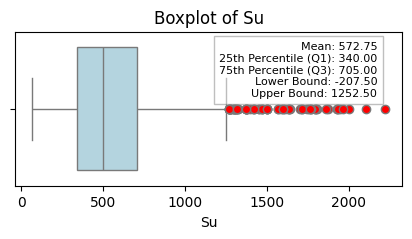

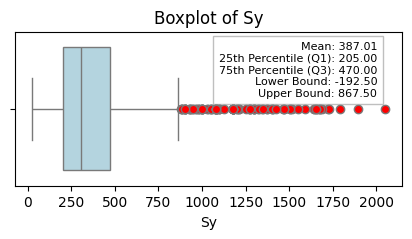

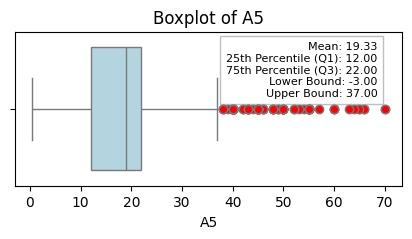

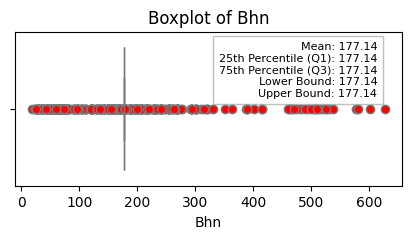

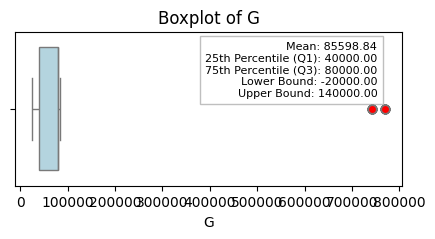

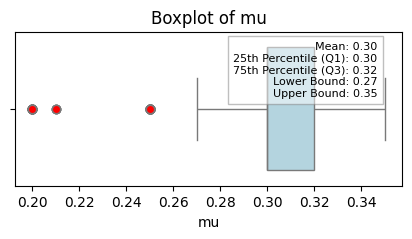

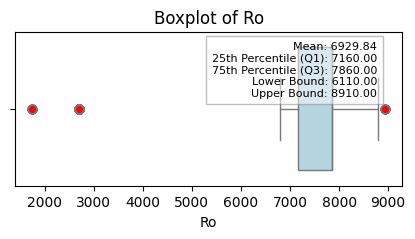

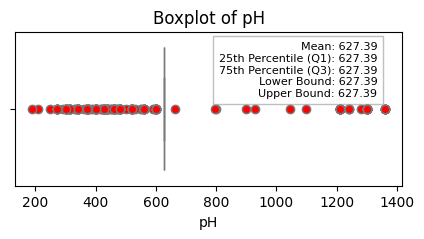

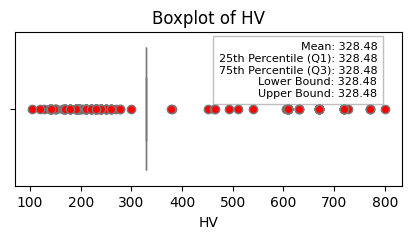

In [38]:
# plot the columns containing outliers
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_outliers(df, columns):
    for col in columns:
        plt.figure(figsize=(5, 2))
        sns.boxplot(x=df[col], color='lightblue', flierprops=dict(markerfacecolor='red', marker='o'))
        
        # Calculate statistics
        mean_val = df[col].mean()
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Add text labels for Q1, Q3, mean, lower bound, and upper bound
        stats_text = (f"Mean: {mean_val:.2f}\n"
                      f"25th Percentile (Q1): {Q1:.2f}\n"
                      f"75th Percentile (Q3): {Q3:.2f}\n"
                      f"Lower Bound: {lower_bound:.2f}\n"
                      f"Upper Bound: {upper_bound:.2f}")
        plt.gcf().text(0.85, 0.83, stats_text, fontsize=8, color='black', 
                       ha='right', va='top', bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray'))
        
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
        plt.show()

plot_outliers(df1, outlier_columns)


In [39]:
# Handle outliers by capping them at lower_bound and upper_bound
for col in outlier_columns:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df1[col] = df1[col].clip(lower=lower_bound, upper=upper_bound)

# Plot comparison between cleaned data and original data

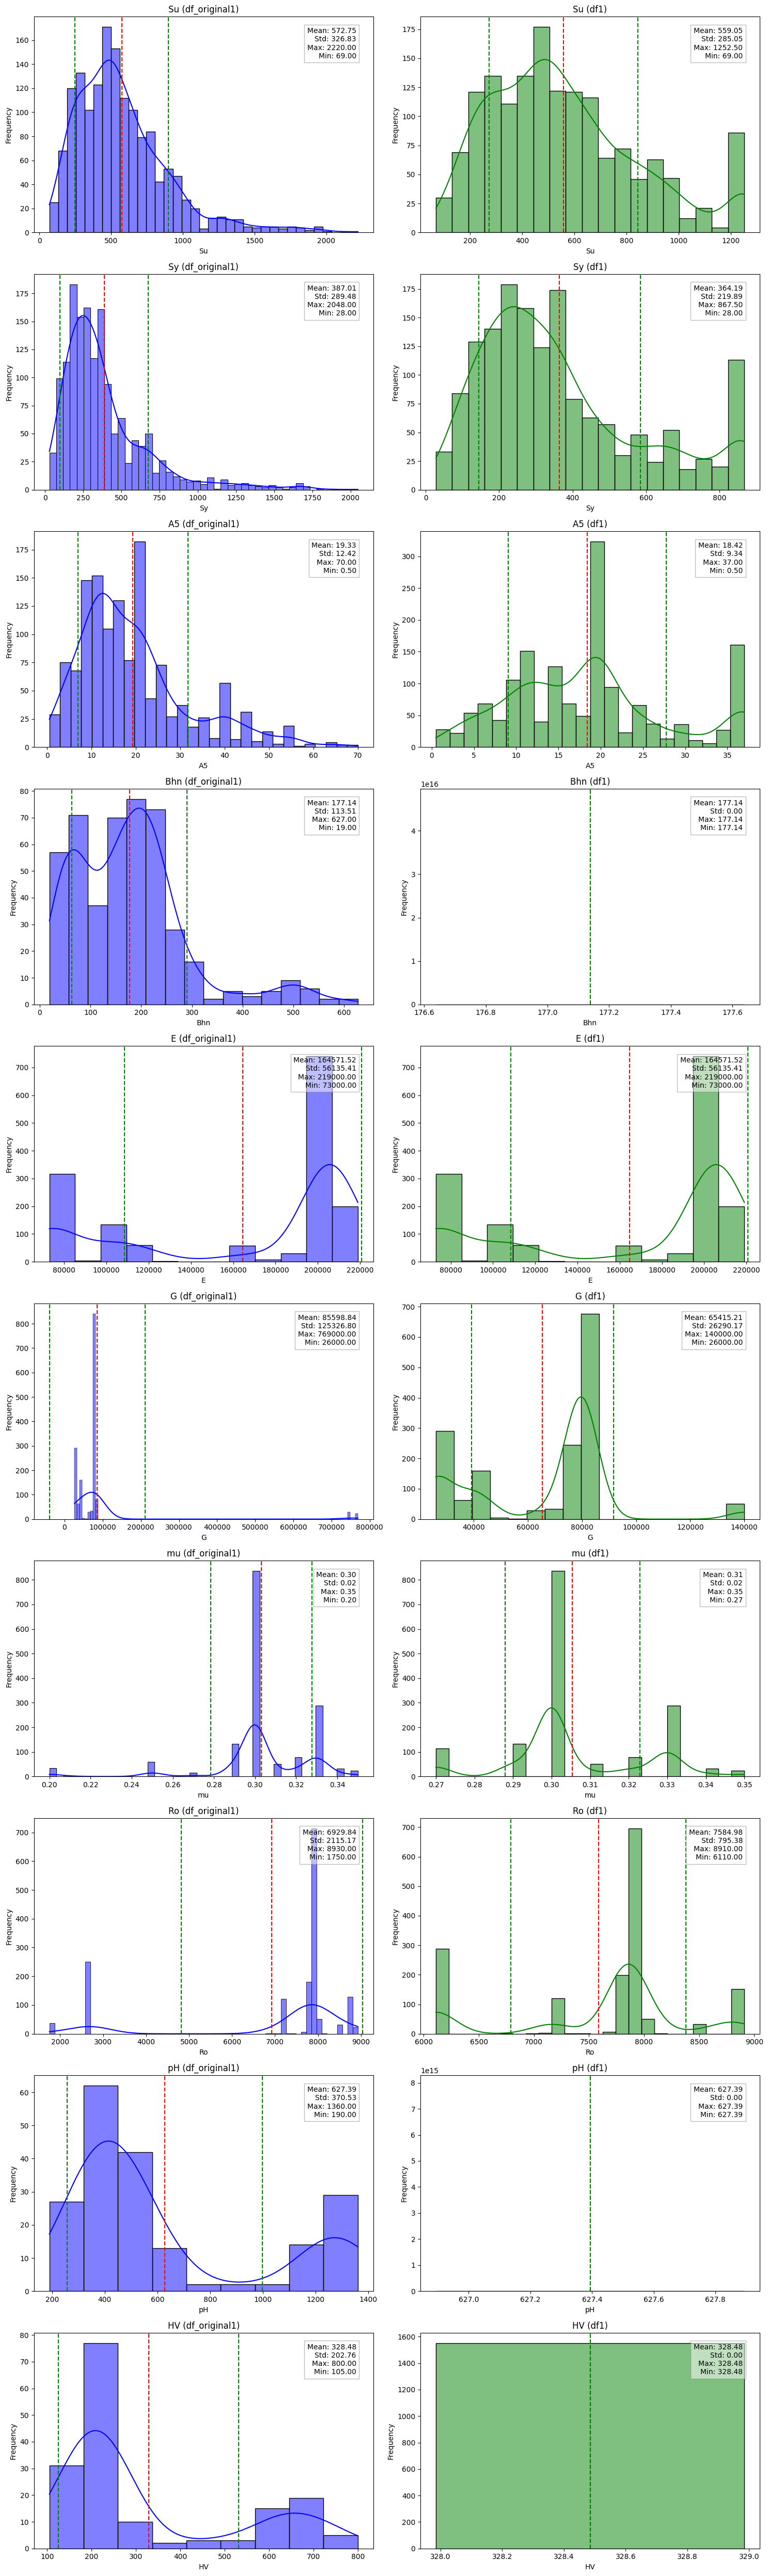

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_comparison(df_original1, df1, columns):
    # Determine the number of rows and columns for the grid
    num_columns = 2  # Number of plots per row
    num_rows = len(columns)  # One row per column

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))

    for i, col in enumerate(columns):
        # Plot for df_original1
        sns.histplot(df_original1[col], kde=True, ax=axes[i, 0], color='blue')
        mean_val = df_original1[col].mean()
        std_val = df_original1[col].std()
        max_val = df_original1[col].max()
        min_val = df_original1[col].min()
        
        # Add vertical lines for mean and standard deviation
        axes[i, 0].axvline(mean_val, color='red', linestyle='--', label='Mean')
        axes[i, 0].axvline(mean_val + std_val, color='green', linestyle='--', label='Mean + Std')
        axes[i, 0].axvline(mean_val - std_val, color='green', linestyle='--', label='Mean - Std')
        
        # Add text box with statistics
        stats_text = f"Mean: {mean_val:.2f}\nStd: {std_val:.2f}\nMax: {max_val:.2f}\nMin: {min_val:.2f}"
        axes[i, 0].text(0.95, 0.95, stats_text, transform=axes[i, 0].transAxes, fontsize=10,
                        verticalalignment='top', horizontalalignment='right',
                        bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray'))
        
        axes[i, 0].set_title(f'{col} (df_original1)')
        axes[i, 0].set_xlabel(col)
        axes[i, 0].set_ylabel('Frequency')

        # Plot for df1
        sns.histplot(df1[col], kde=True, ax=axes[i, 1], color='green')
        mean_val_orig = df1[col].mean()
        std_val_orig = df1[col].std()
        max_val_orig = df1[col].max()
        min_val_orig = df1[col].min()
        
        # Add vertical lines for mean and standard deviation
        axes[i, 1].axvline(mean_val_orig, color='red', linestyle='--', label='Mean')
        axes[i, 1].axvline(mean_val_orig + std_val_orig, color='green', linestyle='--', label='Mean + Std')
        axes[i, 1].axvline(mean_val_orig - std_val_orig, color='green', linestyle='--', label='Mean - Std')
        
        # Add text box with statistics
        stats_text_orig = f"Mean: {mean_val_orig:.2f}\nStd: {std_val_orig:.2f}\nMax: {max_val_orig:.2f}\nMin: {min_val_orig:.2f}"
        axes[i, 1].text(0.95, 0.95, stats_text_orig, transform=axes[i, 1].transAxes, fontsize=10,
                        verticalalignment='top', horizontalalignment='right',
                        bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray'))
        
        axes[i, 1].set_title(f'{col} (df1)')
        axes[i, 1].set_xlabel(col)
        axes[i, 1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Call the function with the numeric columns
plot_comparison(df_original1, df1, numeric_columns)
#plot_comparison(df_original1, df1, ['Su', 'Sy', 'A5'])
